# Классические методы и критерии статистики

## Гипотеза о равенстве средних двух генеральных совокупностей

### Тест Шапиро-Уилка


	Shapiro-Wilk normality test

data:  d.intake
W = 0.95237, p-value = 0.6743


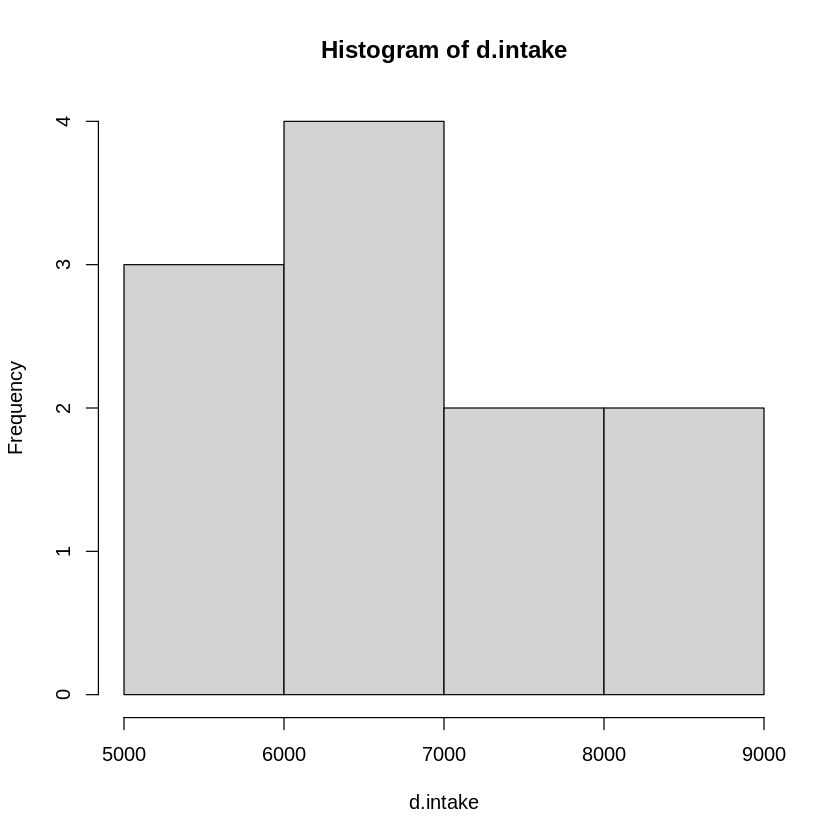

In [36]:
d.intake <- c(5260,5470,5640,6180,6390,6515,6805,7515,7515,8230,8770)
shapiro.test(d.intake)
hist(d.intake)

### Одновыборочный t-критерий

In [1]:
d.intake <- c(5260,5470,5640,6180,6390,6515,6805,7515,7515,8230,8770)

In [2]:
# среднее 
mean(d.intake)

[1] 6753.636

In [3]:
# Отличается ли это выборочное среднее значение от установленной нормы 7725?
t.test(d.intake, mu=7725)


	One Sample t-test

data:  d.intake
t = -2.8208, df = 10, p-value = 0.01814
alternative hypothesis: true mean is not equal to 7725
95 percent confidence interval:
 5986.348 7520.925
sample estimates:
mean of x 
 6753.636 


In [4]:
# Вероятность получить такое (либо большее) значение t при условии, что проверяемая нулевая гипотеза верна, оказалась весьма мала.
# Следовательно, мы можем отклонить проверяемую нулевую гипотезу о равенстве выборочного среднего значения нормативу и принять альтернативную гипотезу.
# Принимая это предположение, мы рискуем ошибиться с вероятностью менее 5%.

### Сравнение двух независимых выборок

In [5]:
# При сравнении двух выборок проверяемая нулевая гипотеза состоит в том, что обе эти выборки происходят из нормально распределенных
# генеральных совокупностей с одинаковыми средними значениями.
install.packages("ISwR")
library(ISwR)
data(energy)
attach(energy)
head(energy)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,expend,stature
,<dbl>,<fct>
1,9.21,obese
2,7.53,lean
3,7.48,lean
4,8.08,lean
5,8.09,lean
6,10.15,lean


In [6]:
# Соответствующие средние значения
tapply(expend, stature, mean)

lean     obese 
 8.066154 10.297778

In [7]:
# t-test (знак ~ это обозначение зависимости между переменными)
t.test(expend ~ stature)


	Welch Two Sample t-test

data:  expend by stature
t = -3.8555, df = 15.919, p-value = 0.001411
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.459167 -1.004081
sample estimates:
 mean in group lean mean in group obese 
           8.066154           10.297778 


### Сравнение двух зависмых выборок

In [8]:
# Парный критерий Стьюдента
# t.test (x, y, paired = TRUE)

## Использование рангового критерия Уилкоксона-Манна-Уитни

### Одновыборочный критерий Уилкоксона

In [9]:
d.intake <- c(5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770)

In [10]:
wilcox.test(d.intake, mu = 7725)

Warning message in wilcox.test.default(d.intake, mu = 7725):
“cannot compute exact p-value with ties”



	Wilcoxon signed rank test with continuity correction

data:  d.intake
V = 8, p-value = 0.0293
alternative hypothesis: true location is not equal to 7725


### Сравнение двух независимых выборок

In [11]:
data (energy)
attach (energy)
str(energy)

The following objects are masked from energy (pos = 3):

    expend, stature




'data.frame':	22 obs. of  2 variables:
 $ expend : num  9.21 7.53 7.48 8.08 8.09 ...
 $ stature: Factor w/ 2 levels "lean","obese": 2 1 1 1 1 1 1 1 1 1 ...


In [12]:
# Отвергаем нулевую гипотезу о равенстве средних
wilcox.test (expend ~ stature, paired = FALSE)

Warning message in wilcox.test.default(x = c(7.53, 7.48, 8.08, 8.09, 10.15, 8.4, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  expend by stature
W = 12, p-value = 0.002122
alternative hypothesis: true location shift is not equal to 0


### Сравнение двух независимых выборок

In [13]:
# wilcox.test(x, y, paired = TRUE )

## Гипотеза об однородности дисперсии

In [14]:
# F-критерий Фишера
data(energy, package="ISwR")
attach (energy)
colnames(energy)

The following objects are masked from energy (pos = 3):

    expend, stature


The following objects are masked from energy (pos = 4):

    expend, stature




[1] "expend"  "stature"

In [15]:
var.test(expend ~ stature)


	F test to compare two variances

data:  expend by stature
F = 0.78445, num df = 12, denom df = 8, p-value = 0.6797
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1867876 2.7547991
sample estimates:
ratio of variances 
          0.784446 
